In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


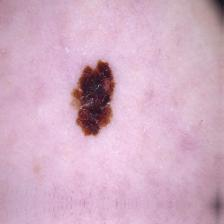

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/SkinCancerDataset/DermMel/DermMel/test/Melanoma/AUG_0_1001.jpeg')

In [ ]:
from tensorflow.keras.layers import Dense, Lambda, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from glob import glob
import cv2
import os

In [ ]:
train=ImageDataGenerator(rescale=1./255)
test=ImageDataGenerator(rescale=1./255)

In [ ]:
cv2.imread("/content/drive/MyDrive/SkinCancerDataset/DermMel/DermMel/test/Melanoma/AUG_0_1001.jpeg").shape

(224, 224, 3)

In [ ]:
train_dataset=train.flow_from_directory("/content/drive/MyDrive/SkinCancerDataset/DermMel/DermMel/train_sep",
                                       target_size=(224,224),
                                       batch_size=20,
                                        class_mode='binary')
valid_dataset=train.flow_from_directory("/content/drive/MyDrive/SkinCancerDataset/DermMel/DermMel/valid",
                                       target_size=(224,224),
                                       batch_size=20,
                                        class_mode='binary')
test_dataset=train.flow_from_directory("/content/drive/MyDrive/SkinCancerDataset/DermMel/DermMel/test",
                                       target_size=(224,224),
                                       batch_size=20,
                                        class_mode='binary')

Found 10682 images belonging to 2 classes.
Found 3562 images belonging to 2 classes.
Found 3561 images belonging to 2 classes.


In [ ]:
dn= DenseNet121(include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3) )

for layer in dn.layers:
  layer.trainable= False

model= Sequential()
model.add(dn)
# model.add(Flatten())
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation= 'relu'))
model.add(Dense(256, activation= 'relu'))
model.add(Dense(128, activation= 'relu'))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

model.summary()

29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                82

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

In [ ]:
model_fit = model.fit(train_dataset,
                    batch_size=128,
                    epochs=20,
                    verbose=1,
                    validation_data=valid_dataset)

Epoch 1/20
535/535 [==============================] - 2662s 5s/step - loss: 0.1951 - accuracy: 0.9266 - val_loss: 0.1499 - val_accuracy: 0.9413
Epoch 2/20
535/535 [==============================] - 126s 236ms/step - loss: 0.1600 - accuracy: 0.9365 - val_loss: 0.1504 - val_accuracy: 0.9402
Epoch 3/20
535/535 [==============================] - 112s 209ms/step - loss: 0.1564 - accuracy: 0.9382 - val_loss: 0.1537 - val_accuracy: 0.9422
Epoch 4/20
535/535 [==============================] - 124s 232ms/step - loss: 0.1468 - accuracy: 0.9418 - val_loss: 0.1569 - val_accuracy: 0.9441
Epoch 5/20
535/535 [==============================] - 104s 195ms/step - loss: 0.1399 - accuracy: 0.9421 - val_loss: 0.1471 - val_accuracy: 0.9424
Epoch 6/20
535/535 [==============================] - 105s 197ms/step - loss: 0.1340 - accuracy: 0.9450 - val_loss: 0.1422 - val_accuracy: 0.9441
Epoch 7/20
535/535 [==============================] - 105s 196ms/step - loss: 0.1309 - accuracy: 0.9468 - val_loss: 0.1538 - v

In [ ]:
model.save('/content/drive/MyDrive/MelanomaSkinCancerDetection_SavedModels/DenseNet121.h5')

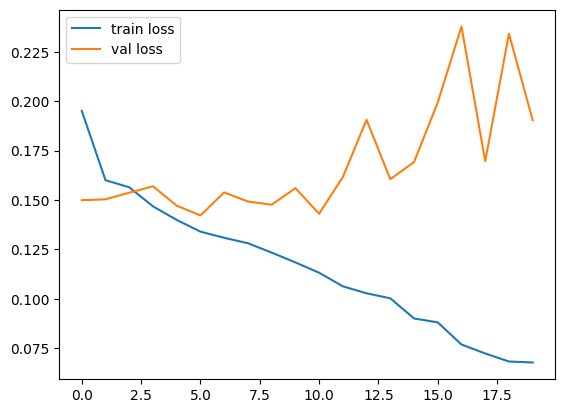

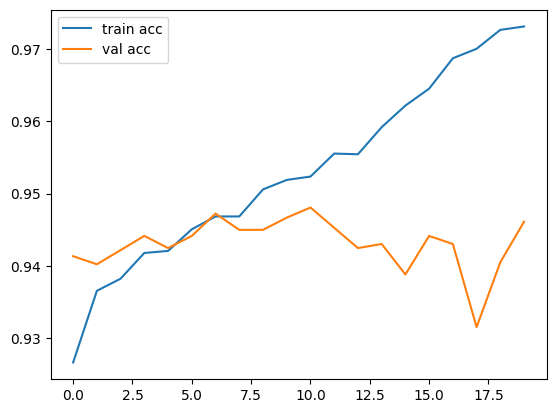

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(model_fit.history['loss'], label= 'train loss')
plt.plot(model_fit.history['val_loss'], label= 'val loss')
plt.legend()
plt.show()
plt.savefig('lossVal_loss')

plt.plot(model_fit.history['accuracy'], label= 'train acc')
plt.plot(model_fit.history['val_accuracy'], label= 'val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
loss, acc = model.evaluate(test_dataset)

179/179 [==============================] - 1308s 7s/step - loss: 0.2036 - accuracy: 0.9371
0.9370962977409363
